# Chapter 5: Why are deep neural networks hard to train?

## The vanishing gradient problem

## What's causing the vanishing gradient problem? Unstable gradients in deep neural nets

### Exercise 1 ([link](http://neuralnetworksanddeeplearning.com/chap5.html#exercise_255808)): avoiding the unstable gradient problem with a steeper activation function?

Using our random weight initialization by a Gaussian with mean $0$ and standard deviation $1$, our weights are "typically" the same order of magnitude as $1$ (actually, the mean size is $\sqrt{\frac 2 \pi} \approx 0.8$).

Ideally then, we'd like an activation function whose derivative is as often as possible close to $1$, so the learning speeds of each layer would be similar despite the product of many terms (all close to 1).

Such an activation function wouldn't solve the unstable gradient problem (as explained in the paragraph just above this exercise in the book, the product of terms make the situation intrinsically unstable; if for some reason the weights all grow, we'll still have an exploding gradient, and a vanishing gradient if they all decrease). But it would probably help.

### Problem 1 ([link](http://neuralnetworksanddeeplearning.com/chap5.html#problems_778071)): ranges of weights and activations avoiding the vanishing gradient problem

**(1)** Since $\forall z \in \mathbb{R}, \sigma'(z) \leq \frac 1 4$, we can only ever have $|w \sigma'(wa+b)| \geq 1$ when $|w| \geq 4$.

**(2)** Since $\sigma'$ is largest around $0$, we'll get greater intervals with $b = 0$.

So we want to solve:

\begin{equation*}
    \begin{aligned}
        | w \sigma'(wa)| \geq 1 &\iff \sigma'(wa) \geq \frac{1}{|w|} \\
        &\iff \frac{e^{-wa}}{(1 + e^{-wa})^2} \geq \frac{1}{|w|} \\
        &\iff 0 \geq 1 + ( 2 - |w|) e^{-wa} + (e^{-wa})^2
    \end{aligned}
\end{equation*}

Let's denote $x = e^{-wa}$.

We've got a quadratic inequation: $x^2 + (2 - |w|)x + 1 \leq 0$.

The discriminant of this equation is:

$$\Delta = (2 - |w|)^2 - 4 = |w|(|w| - 4)$$

If $|w| > 4$, then $\Delta > 0$ and we have two distinct real roots that we'll note $r_1$ and $r_2$, $r_1 < r_2$.

As the coefficient before $x^2$ is positive, this inequation will be satisfied for $r_1 \leq x \leq r_2$.

Translating into $a$:

\begin{equation*}
    \begin{aligned}
        r_1 \leq e^{-wa} \leq r_2 &\iff \ln r_1 \leq -wa \leq \ln r_2 \\
        &\iff - \ln r_2 \leq wa \leq - \ln r_1
    \end{aligned}
\end{equation*}

If $w > 0$, this is equivalent to:

$$- \frac 1 w \ln r_2 \leq a \leq - \frac 1 w \ln r_1$$

And so the width of the interval will be:

$$\frac 1 w (-\ln r_1 + \ln r_2) = \frac 1 w \ln \frac{r_2}{r_1} = \frac{1}{|w|} \ln \frac{r_2}{r_1}$$

If $w < 0$, this is equivalent to:

$$- \frac 1 w \ln r_1 \leq a \leq - \frac 1 w \ln r_2$$

And so the width of the interval will be:

$$- \frac 1 w (\ln r_2 - \ln r_1) = - \frac 1 w \ln \frac{r_2}{r_1} = \frac{1}{|w|} \ln \frac{r_2}{r_1}$$

So the width of the interval will always be (again, provided $|w| \geq 4$ and $b = 0$):

$$\frac{1}{|w|} \ln \frac{r_2}{r_1}$$

Now we know ([Vieta's formulas](https://en.wikipedia.org/wiki/Vieta%27s_formulas)) that the roots of the quadratic equation $a x^2 + bx + c = 0$ satisfy $r_1 r_2 = \frac c a$. In our case, $r_1 r_2 = 1$.

Therefore, $\frac{1}{r_1} = r_2$ and $\frac{r_2}{r_1} = r_2^2$. So the width of our interval can be written:

$$\frac{1}{|w|} \ln(r_2^2) = \frac{2}{|w|} \ln r_2$$

All we have to do now is compute $r_2$:

\begin{equation*}
    \begin{aligned}
        r_2 &= \frac{-b + \sqrt{\Delta}}{2a} \\
        &= \frac{|w| - 2 + \sqrt{|w|(|w| - 4)}}{2} \\
        &= \frac{|w| \left( 1 + \sqrt{1 - 4/|w|} \right)}{2} - 1
    \end{aligned}
\end{equation*}

Conclusion: the set of $a$ satisfying $|w\sigma'(wa+b)| \geq 1$ can range over an interval no greater in width than

$$\frac{2}{|w|} \ln\left( \frac{|w|(1+\sqrt{1-4/|w|})}{2}-1\right)$$

**(3)** Let's plot the function (which is a very imprecise, but visual, way of numerically determining a maximum):

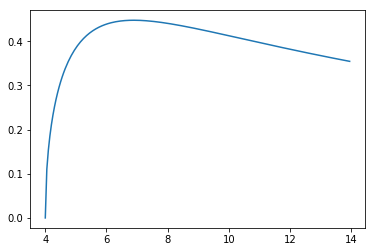

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):
    return 2 / x * math.log(x / 2 * (1 + math.sqrt(1 - 4 / x)) - 1)

X = np.arange(4.0, 14.0, 0.05)
Y = np.array([f(x) for x in X])

plt.plot(X, Y)
plt.show()

We see that the maximum is around $|w| = 7$. Being more precise:

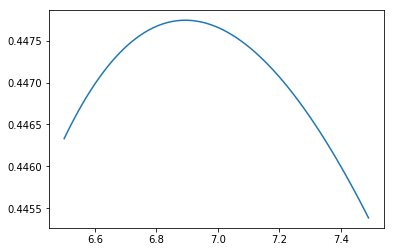

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):
    return 2 / x * math.log(x / 2 * (1 + math.sqrt(1 - 4 / x)) - 1)

X = np.arange(6.5, 7.5, 0.01)
Y = np.array([f(x) for x in X])

plt.plot(X, Y)
plt.show()

We see that the width is greatest at $|w| \approx 6.9$, where it takes a value $\approx 0.45$.

### Problem 2: constructing an identity neuron

**Note:** For this problem, I did not follow Nielsen's hint. The approximation I will construct seems satisfying to me, however I feel there might be a better solution. In particular, another solution might perhaps get arbitrarily close to the identity, which my solution can't do.

We start from a regular sigmoid (setting $w_1 = w_2 = 1$, $b = 0$):

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sigmoid(w1, w2, b, x):
    return w2 / (1 + math.exp(- w1 * x - b))

def plot(w1, w2, b):
    # Plot between -3 and 3:
    X1 = np.arange(-3.0, 3.0, 0.05)
    Y1 = np.array([sigmoid(w1, w2, b, x) for x in X1])
    
    # Plot between 0 and 1:
    X2 = np.arange(0.0, 1.0, 0.01)
    Y2 = np.array([sigmoid(w1, w2, b, x) for x in X2])
    Ylin = X2  # target function

    plt.subplot(1, 2, 1)  # 1 line, 2 columns, position 1
    plt.ylim(bottom=0, top=1)
    plt.plot(X1, Y1)

    plt.subplot(1, 2, 2)
    plt.ylim(bottom=0, top=1)
    plt.plot(X2, Y2, label="sigmoid")
    plt.plot(X2, Ylin, label="target")
    plt.legend()

    plt.show()

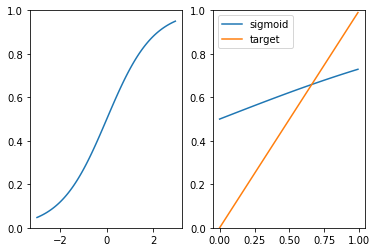

In [5]:
w1 = 1
w2 = 1
b = 0
plot(w1, w2, b)

What happens if we impose the following 2 conditions on our final function?

* $w_2 \sigma(0.5 w_1 + b) = 0.5$
* $w_2 \sigma(w_1 + b) = 1$

Those conditions mean that the sigmoid approximation of the identity must be exact on abscisses $0.5$ and $1$.

In other terms,

\begin{equation}
\frac{w_2}{1 + e^{-0.5 w_1 - b}} = 0.5
\tag{1}\end{equation}

\begin{equation}
\frac{w_2}{1 + e^{w_1 - b}} = 1
\tag{2}\end{equation}

Dividing (2) by (1) we get:

\begin{equation*}
    \begin{aligned}
        2 &= \frac{1 + e^{-0.5 w_1} e^{-b}}{1 + e^{-w_1}e^{-b}} \\
        1 + 2 e^{-w_1} e^{-b} &= e^{-0.5 w_1} e^{-b} \\
        1 &= e^{-b} \left( e^{-0.5 w_1} - 2 e^{-w_1} \right)
    \end{aligned}
\end{equation*}

Supposing $w_1$ fixed, we obtain:

$$b = \ln \left( e^{-0.5 w_1} - 2 e^{-w_1} \right)$$

Note that this imposes $\left( e^{-0.5 w_1} - 2 e^{-w_1} \right) > 0$, and so $w_1 > 2 \ln 2 \approx 1.39$.

Now we can deduce $w_2$ using (2):

$$w_2 = 1 + e^{- w_1 - b}$$

Playing with the parameter $w_1$ gives rather satisfying approximations around $w_1 = 6$.

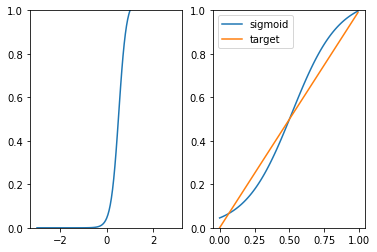

In [7]:
w1 = 6
b = math.log(math.exp(- 0.5 * w1) - 2 * math.exp(- w1))
w2 = 1 + math.exp(-(w1 + b))
plot(w1, w2, b)

## Unstable gradients in more complex networks

## Other obstacles to deep learning